Дисперсія (m=6): 6.001403e-03


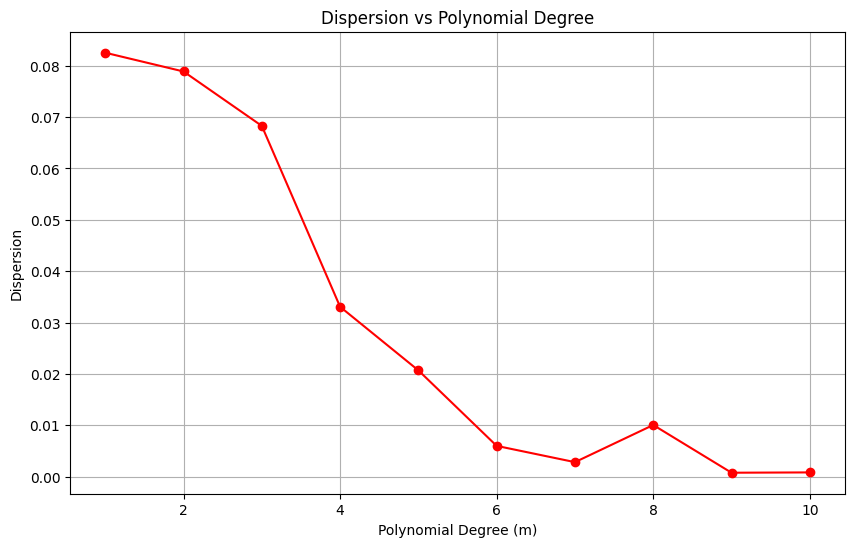

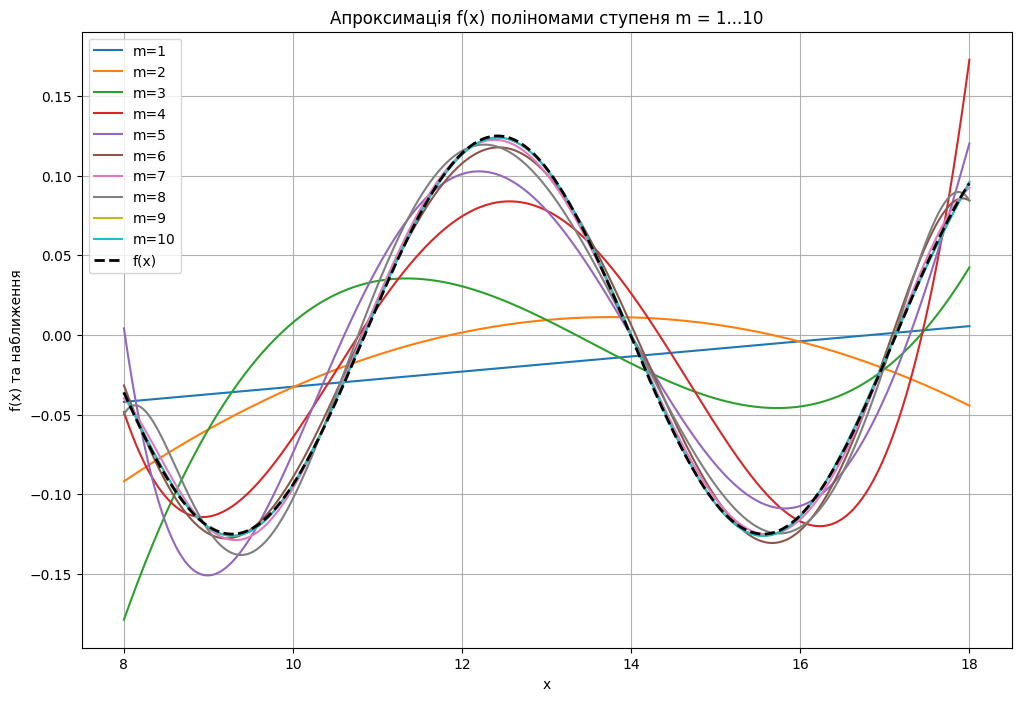

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1 / 8) * np.sin(x + 8)

# Генерація даних
n = 30
x0, xn = 8, 18
X = np.linspace(x0, xn, n)
F = f(X)

# Збереження та зчитування з файлу
input_file = "input.txt"
np.savetxt(input_file, np.column_stack((X, F)), fmt='%.6f', header='X F', comments='')
X, F = np.loadtxt(input_file, unpack=True, skiprows=1)

# Реалізація методу Гаусса
def gauss(A, b):
    n = len(b)
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(A[r, i]))
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[i], b[max_row] = b[max_row], b[i]
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
    return x

# Основна апроксимація для m = 6
m = 6
B = np.zeros((m + 1, m + 1))
C = np.zeros(m + 1)

for k in range(m + 1):
    for j in range(m + 1):
        B[k, j] = np.sum(X**(k + j))
    C[k] = np.sum(F * X**k)

A = gauss(B.copy(), C.copy())

# Дисперсія
D = np.sqrt(np.sum((f(X) - np.polyval(A[::-1], X))**2) / (n + 1))
print(f"Дисперсія (m=6): {D:.6e}")

# Помилка у точках
x_vals = np.linspace(x0, xn, 7)
y_true = f(x_vals)
y_approx = np.polyval(A[::-1], x_vals)
err = abs(y_true - y_approx)

# Запис помилок у файл
err_file = "errors.txt"
np.savetxt(err_file, np.column_stack((x_vals, err)), fmt='%.6f', header='X Error', comments='')

# Залежність дисперсії від степеня m
dispersions = []
m_values = range(1, 11)

for m in m_values:
    B = np.zeros((m + 1, m + 1))
    C = np.zeros(m + 1)
    for k in range(m + 1):
        for j in range(m + 1):
            B[k, j] = np.sum(X**(k + j))
        C[k] = np.sum(F * X**k)
    A = gauss(B.copy(), C.copy())
    D = np.sqrt(np.sum((f(X) - np.polyval(A[::-1], X))**2) / (n + 1))
    dispersions.append(D)

# Графік дисперсії
plt.figure(figsize=(10, 6))
plt.plot(m_values, dispersions, marker='o', linestyle='-', color='red')
plt.xlabel("Polynomial Degree (m)")
plt.ylabel("Dispersion")
plt.title("Dispersion vs Polynomial Degree")
plt.grid()
plt.savefig("dispersion_vs_degree.png")
plt.show()

# Апроксимації та похибки на щільній сітці
x_dense = np.linspace(x0, xn, 20 * n)
errors_all = []

plt.figure(figsize=(12, 8))

for m in range(1, 11):
    B = np.zeros((m + 1, m + 1))
    C = np.zeros(m + 1)
    for k in range(m + 1):
        for j in range(m + 1):
            B[k, j] = np.sum(X**(k + j))
        C[k] = np.sum(F * X**k)
    A = gauss(B.copy(), C.copy())
    y_dense_approx = np.polyval(A[::-1], x_dense)
    error = np.abs(f(x_dense) - y_dense_approx)
    errors_all.append(error)
    plt.plot(x_dense, y_dense_approx, label=f"m={m}")

plt.plot(x_dense, f(x_dense), 'k--', label='f(x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x) та наближення')
plt.title('Апроксимація f(x) поліномами ступеня m = 1...10')
plt.legend()
plt.grid()
plt.savefig("approximations_plot.png")
plt.show()

# Збереження помилок на щільній сітці
errors_dense = np.column_stack((x_dense, *errors_all))
header = 'X ' + ' '.join([f'Err_m{m}' for m in range(1, 11)])
np.savetxt("dense_errors.txt", errors_dense, fmt='%.6f', header=header, comments='')
